In [ ]:
# przyklad 2 jako kontynuacja przykladu 1
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import RocCurveDisplay 
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("faults.csv", header=0)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [16]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps','Other_Faults'] 
X = df.drop(target_cols, axis=1) 
y = df[target_cols].values.argmax(axis=1)+1

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc = SVC(kernel='rbf', degree=2) 
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
print(classification_report(y_test, y_test_pred, target_names=target_cols))

              precision    recall  f1-score   support

      Pastry       0.57      0.50      0.53        32
   Z_Scratch       0.79      0.88      0.83        56
    K_Scatch       0.98      0.89      0.93       108
      Stains       0.88      0.94      0.91        16
   Dirtiness       0.57      0.80      0.67        10
       Bumps       0.61      0.63      0.62        90
Other_Faults       0.71      0.71      0.71       174

    accuracy                           0.75       486
   macro avg       0.73      0.76      0.74       486
weighted avg       0.76      0.75      0.75       486



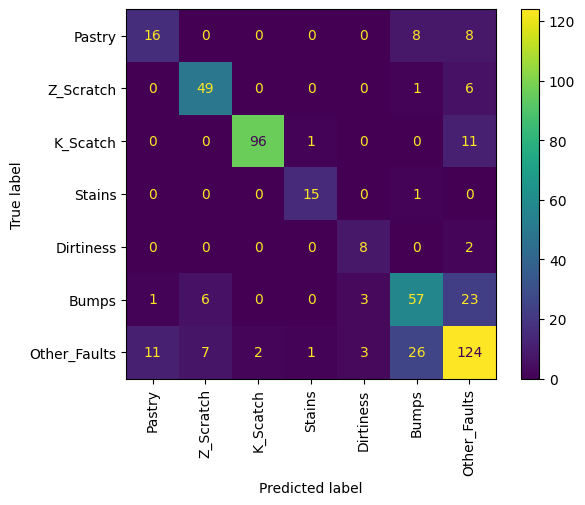

In [18]:
# Obliczenie macierzy pomyłek i wyświetlenie w formie graficznej (zbiór testowy) 
cm = confusion_matrix(y_test, y_test_pred) # obliczenie macierzy pomyłek 
disp = ConfusionMatrixDisplay(cm, display_labels=target_cols) 
disp.plot()
plt.xticks(rotation=90) 
plt.show()